# Maximum a posteriori (MAP) estimation on NMF

Project of *Introduction to Probabilistic Graphical Models* course (Umut Şimşekli)

Author: Guillaume Fradet

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Theory" data-toc-modified-id="Theory-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Theory</a></span><ul class="toc-item"><li><span><a href="#Directed-graphical-model" data-toc-modified-id="Directed-graphical-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Directed graphical model</a></span></li><li><span><a href="#Derivation-of-the-Expectation-Maximization-algorithm" data-toc-modified-id="Derivation-of-the-Expectation-Maximization-algorithm-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Derivation of the Expectation-Maximization algorithm</a></span><ul class="toc-item"><li><span><a href="#Latent-random-variables" data-toc-modified-id="Latent-random-variables-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Latent random variables</a></span></li><li><span><a href="#E-step" data-toc-modified-id="E-step-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>E-step</a></span></li><li><span><a href="#M-step" data-toc-modified-id="M-step-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>M-step</a></span></li></ul></li></ul></li><li><span><a href="#Application" data-toc-modified-id="Application-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Application</a></span><ul class="toc-item"><li><span><a href="#Implementation-of-EM-algorithm" data-toc-modified-id="Implementation-of-EM-algorithm-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Implementation of EM algorithm</a></span></li><li><span><a href="#Influence-of-$\beta_w$-and-$\beta_h$" data-toc-modified-id="Influence-of-$\beta_w$-and-$\beta_h$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Influence of $\beta_w$ and $\beta_h$</a></span></li><li><span><a href="#Influence-of-$\alpha_w$-and-$\alpha_h$" data-toc-modified-id="Influence-of-$\alpha_w$-and-$\alpha_h$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Influence of $\alpha_w$ and $\alpha_h$</a></span></li><li><span><a href="#Influence-of-K" data-toc-modified-id="Influence-of-K-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Influence of K</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

The following cell enables the *cancel* $\LaTeX$ package.

In [1]:
%%javascript
MathJax.Extension["TeX/cancel"]={version:"2.4.0",ALLOWED:{color:1,mathcolor:1,background:1,mathbackground:1,padding:1,thickness:1}};MathJax.Hub.Register.StartupHook("TeX Jax Ready",function(){var c=MathJax.InputJax.TeX,a=MathJax.ElementJax.mml,b=MathJax.Extension["TeX/cancel"];b.setAttributes=function(h,e){if(e!==""){e=e.replace(/ /g,"").split(/,/);for(var g=0,d=e.length;g<d;g++){var f=e[g].split(/[:=]/);if(b.ALLOWED[f[0]]){if(f[1]==="true"){f[1]=true}if(f[1]==="false"){f[1]=false}h[f[0]]=f[1]}}}return h};c.Definitions.Add({macros:{cancel:["Cancel",a.NOTATION.UPDIAGONALSTRIKE],bcancel:["Cancel",a.NOTATION.DOWNDIAGONALSTRIKE],xcancel:["Cancel",a.NOTATION.UPDIAGONALSTRIKE+" "+a.NOTATION.DOWNDIAGONALSTRIKE],cancelto:"CancelTo"}},null,true);c.Parse.Augment({Cancel:function(e,g){var d=this.GetBrackets(e,""),f=this.ParseArg(e);var h=b.setAttributes({notation:g},d);this.Push(a.menclose(f).With(h))},CancelTo:function(e,g){var i=this.ParseArg(e),d=this.GetBrackets(e,""),f=this.ParseArg(e);var h=b.setAttributes({notation:a.NOTATION.UPDIAGONALSTRIKE+" "+a.NOTATION.UPDIAGONALARROW},d);i=a.mpadded(i).With({depth:"-.1em",height:"+.1em",voffset:".1em"});this.Push(a.msup(a.menclose(f).With(h),i))}});MathJax.Hub.Startup.signal.Post("TeX cancel Ready")});MathJax.Ajax.loadComplete("[MathJax]/extensions/TeX/cancel.js");

<IPython.core.display.Javascript object>

--------

Consider the following probabilistic non-negative matrix factorization (NMF) model: (for $f = 1, . . . , F , n = 1, . . . , N , k = 1, . . . , K$)

<center>
    <br>
    $\large$
    $w_{fk} \sim \mathcal{G}(w_{fk}; \alpha_w,\beta_w)$ 
    <br><br>
    $h_{kn} \sim \mathcal{G}(h_{kn}; \alpha_h,\beta_h)$ 
    <br><br>
    $v_{fn}|w_{f,:},h_{:,n} \sim \mathcal{PO}(v_{fn}; \sum_{k=1}^Kw_{fk}h_{kn})$ 
</center>

where $\mathcal{G}$ and $\mathcal{PO}$ denote the gamma and the Poisson distributions, respectively.

## Theory
### Directed graphical model

<img width="500" src="DAG1.png" />
<center><i>Directed graphical model (plate notation)</i></center>

### Derivation of the Expectation-Maximization algorithm

<div class="alert alert-info">
Derive an Expectation-Maximization algorithm for finding the maximum a-posteriori estimate (MAP), defined
as follows: $$(W^*, H^*)=\operatorname*{arg\max}_{W,H}\log p(W, H|V)$$

where $V$, $W$, and $H$ are the matrices with the form: $V=[v_{fn}]_{f,n}$, $W=[w_{fk}]_{f,k}$, $H=[h_{kn}]_{k,n}$. Define auxiliary latent random variables (i.e. data augmentation) if necessary (in that case draw the new graphical model). You need to end up with some "multiplicative update rules". Show all your work.
</div>

#### Latent random variables

We introduce a set of latent random variables that we define as follows: 

$$ s_{fkn} \sim \mathcal{PO}(s_{fkn};w_{fk},h_{kn})$$

$$v_{fn} = \sum_{k=1}^Ks_{fkn} \Rightarrow v_{fn} \sim \mathcal{PO}(v_{fn}; \sum_{k=1}^Kw_{fk}h_{kn})$$


<img width="500" src="DAG2.png" />
<center><i>New directed graphical model with latent variables (plate notation)</i></center>

#### E-step

We want to compute:

$\mathcal{L}_t(W,H)= \mathbb{E}[\log p(V,S,W,H)]_{p(S|V,W^{(t)}, H^{(t)})}$

$
\begin{align*}
p(V,S,W,H) & = p(V,S|W,H)p(W,H)\\
& = p(V|S)p(S|W,H)p(W)p(H)
\end{align*}
$ 

$
\begin{align}
\boxed{\mathcal{L}_t(W,H)=^+ \mathbb{E}[\log p(S|W,H)] + \log p(W) +\log p(H)}
\end{align}
$

----

First, we calculate $p(S|V,W,H)$.

$
\begin{align*}
p(S|V,W,H) & = \frac{p(S,V|W,H)}{p(V|W,H)}\\
\end{align*}
$

$
\begin{align}
\log p(S|V,W,H) & = \log p(S,V|W,H) - \log p(V|W,H)\\
\end{align}
$

$
\begin{align*}
\log p(S,V|W,H) & = \sum_f\sum_n\left[\sum_k\left(-w_{fk}h_{kn}+s_{fkn}\log (w_{fk}h_{kn})-\log \Gamma(s_{fkn}+1)\right) + \log \delta(v_{fn}-\sum_k s_{fkn}) \right]
\end{align*}
$

$
\begin{align*}
\log p(V|W,H) & = \log \sum_S p(V|S)p(S|W,H)\\
& = \log \prod_{f,n}\mathcal{PO}\left(v_{fn};\sum_k w_{fk}, h_{kn} \right)\\
& = \sum_f\sum_n\left[v_{fn} \log \left(\sum_k w_{fk} h_{kn}\right) - \sum_k w_{fk} h_{kn} - \log \Gamma(v_{fn}+1) \right]
\end{align*}
$

From $(2)$, we now have:

$
\begin{align*}
\log p(S|V,W,H) = & \sum_f\sum_n \left[\sum_k\left( \cancel{-w_{fk}h_{kn}} +s_{fkn} \log (w_{fk}h_{kn})-\log \Gamma(s_{fkn}+1)\right) \right. \\
 &\left. + \log \delta(v_{fn}-\sum_k s_{fkn}) - v_{fn} \log \sum_k w_{fk}h_{kn} + \cancel{\sum_k w_{fk}h_{kn}} + \log \Gamma(v_{fn}+1) \right]\\
= & \sum_f\sum_n\left[\sum_k\left(s_{fkn} \log (w_{fk}h_{kn})-\log \Gamma(s_{fkn}+1) \right)+ \log \delta(v_{fn}-\sum_k s_{fkn})+ \log \Gamma(v_{fn}+1) - v_{fn} \log \sum_k w_{fk}h_{kn} \right]\\
= & \sum_f\sum_n\left[\sum_k\left(s_{fkn} \log (w_{fk}h_{kn})-\log \Gamma(s_{fkn}+1) \right)+ \log \delta(v_{fn}-\sum_k s_{fkn})+ \log \Gamma(v_{fn}+1) - \sum_k\left(s_{fkn}\log \sum_i w_{fi}h_{in} \right) \right]\\
= & \sum_f\sum_n\left[\sum_k\left(s_{fkn} \log (w_{fk}h_{kn}) -s_{fkn}\log \sum_i w_{fi}h_{in} -\log \Gamma(s_{fkn}+1) \right)+ \log \delta(v_{fn}-\sum_k s_{fkn})+ \log \Gamma(v_{fn}+1) \right]\\
= & \sum_f\sum_n\left[\sum_k\left(s_{fkn} \log \frac{w_{fk}h_{kn}}{\sum_i w_{fi}h_{in}} -\log \Gamma(s_{fkn}+1) \right)+ \log \delta(v_{fn}-\sum_k s_{fkn})+ \log \Gamma(v_{fn}+1) \right]\\
= & \sum_f\sum_n\left[\sum_k\left(s_{fkn} \log \frac{w_{fk}h_{kn}}{\sum_i w_{fi}h_{in}} -\log (s_{fkn}!) \right)+ \log \delta(v_{fn}-\sum_k s_{fkn})+ \log (v_{fn}!) \right]\\
= & \sum_f\sum_n\left[\sum_k \log \left( \Big(\frac{w_{fk}h_{kn}}{\sum_i w_{fi}h_{in}}\Big)^{s_{fkn}} \frac{1}{s_{fkn}!} \right)+ \log \left(\delta\Big(v_{fn}-\sum_k s_{fkn}\Big)v_{fn}!\right) \right]\\
= & \sum_f\sum_n\left[\log \left(\prod_k \bigg( \Big(\frac{w_{fk}h_{kn}}{\sum_i w_{fi}h_{in}}\Big)^{s_{fkn}} \frac{1}{s_{fkn}!} \bigg) \right)+ \log \left(\delta\Big(v_{fn}-\sum_k s_{fkn}\Big)v_{fn}!\right) \right]\\
= & \sum_f\sum_n\log \left(\frac{v_{fn}!}{\prod_k s_{fkn}!} \prod_k \bigg( \Big(\frac{w_{fk}h_{kn}}{\sum_i w_{fi}h_{in}}\Big)^{s_{fkn}}  \bigg) \delta\Big(v_{fn}-\sum_k s_{fkn}\Big)\right)\\
= & \sum_f\sum_n\log \left(\mathcal{Mult}\left(s_{f1n},...,s_{fKn} | p_{f1n},...,p_{fKn}; v_{fn} \right) \right) \\
\end{align*}
$

With $p_{fkn}= \large \frac{w_{fk}h_{kn}}{\sum_i w_{fi}h_{in}}$

$
\begin{align*}
p(S|V,W,H) & = \exp \left(\sum_f\sum_n\log \left(\mathcal{Mult}\left(s_{f1n},...,s_{fKn} | p_{f1n},...,p_{fKn}; v_{fn} \right) \right) \right)\\
& = \exp \left(\log\Big( \prod_f\prod_n\mathcal{Mult}\left(s_{f1n},...,s_{fKn} | p_{f1n},...,p_{fKn}; v_{fn} \right) \Big) \right)\\
& = \prod_f\prod_n\mathcal{Mult}\left(s_{f1n},...,s_{fKn} | p_{f1n},...,p_{fKn}; v_{fn} \right)
\end{align*}
$

From $(1)$, we had the following equation for the log likelihood:

$
\begin{align*}
\mathcal{L}_t(W,H) & =^+ \mathbb{E}[\log p(S|W,H)] + \log p(W) +\log p(H)\\
& =^+ \sum_f\sum_n\sum_k\left( \mathbb{E}\big[s_{fkn}\big]\log (w_{fk}h_{kn})-w_{fk}h_{kn} \right)\\
& + \sum_f\sum_k\big((\alpha_w-1)\log w_{fk}-\beta_w w_{fk}\big)+ \sum_k\sum_n\big((\alpha_h-1)\log h_{kn}-\beta_h h_{kn}\big)
\end{align*}
$

<div class="alert alert-info">
If $S_1,...,S_N \sim \mathcal{Mult}\big(S_{1:N}|p_{1:N};n\big)$

Then $\mathbb{E}[S_i]=n.p_i$
</div>

We have
$
\begin{align*}
\boxed{\mathbb{E}[s_{fkn}] = v_{fn}\frac{w_{fk}h_{kn}}{\sum_i w_{fi}h_{in}} }
\end{align*}
$

#### M-step

$$W^{(t+1)}=\operatorname*{arg\max}_W\mathcal{L}_t(W,H^{(t)})$$

$$H^{(t+1)}=\operatorname*{arg\max}_H\mathcal{L}_t(W^{(t)},H)$$

When we derive over $w_{fk}$, we get: 

$
\begin{align*}
& \frac{\sum_n \mathbb{E}[s_{fkn}]^{(t)}}{w_{fk}^{(t+1)}}-\sum_n h_{kn}^{(t)}+\frac{\alpha_w-1}{w_{fk}^{(t+1)}}-\beta_w = 0\\[5pt]
& \Rightarrow \boxed{w_{fk}^{(t+1)}=\frac{\alpha_w-1 +\sum_n \mathbb{E}[s_{fkn}]^{(t)}}{\beta_w + \sum_n h_{kn}^{(t)}}}
\end{align*}
$

When we derive over $h_{kn}$, we get: 

$
\begin{align*}
& \frac{\sum_f \mathbb{E}[s_{fkn}]^{(t)}}{h_{kn}^{(t+1)}}-\sum_f w_{fk}^{(t)}+\frac{\alpha_h-1}{h_{kn}^{(t+1)}}-\beta_h = 0\\[5pt]
& \Rightarrow \boxed{h_{kn}^{(t+1)}=\frac{\alpha_h-1 +\sum_f \mathbb{E}[s_{fkn}]^{(t)}}{\beta_h + \sum_f w_{fk}^{(t)}}}
\end{align*}
$

## Application

<div class="alert alert-info">
In this part, our aim will be to analyze a dataset of face images. We will use the AT&T Database of Faces. This dataset contains face images from 40 distinct subjects, where there are 10 images for each subject. In total there are 400 images in the dataset, where the size of each image is 92 x 112 pixels, with 256 gray levels per pixel.

In this experiment, we will "vectorize" all the images in the dataset and concatenate these vectors in order to
represent the whole dataset as a matrix. Finally, we obtain an observed matrix V of dimensions F = 92 × 112 and
N = 400. We provide the matrix V obtained from the dataset in the file "attfaces.mat".

The goal of the experiment is to obtain a "parts-based-representation" of faces by learning an NMF model on this
dataset. Our hope is that, when we estimate the matrices W and H by using V , the columns of W will correspond
to some images that only contain a particular part of a face (remember that each column of W is a vector of size
F = 92 × 112. Therefore you can reshape this vector to obtain an image (matrix) of size 92 × 112.).
</div>

### Implementation of EM algorithm

<div class="alert alert-info">
Implement of the EM algorithm that you developed in the first part.
</div>

To implement the EM algorithm, we derive the three formulas that we have for the E-step and M-step (last three boxed formulas), into two simple updates. We do this to reduce the time of computation. 

The updates are: 

$
\begin{align*}
W^{(t+1)} & = \bigg( W^{(t)} * \Big( \big(V / W^{(t)}H^{(t)}\big)H^{(t)^T} \Big)+(\alpha_w-1)J_{F,K}\bigg)/ \Big(\beta_wJ_{F,K}+J_{F,N}H^{(t)^T} \Big)\\
H^{(t+1)} & = \bigg( H^{(t)} * \Big( W^{(t)^T}\big(V / W^{(t)}H^{(t)}\big) \Big)+(\alpha_h-1)J_{K,N}\bigg)/ \Big(\beta_hJ_{K,N}+W^{(t)^T}J_{F,N} \Big)
\end{align*}
$

Where $J_{F,N}$ is a matrix of ones of shape $F\times N$.

In [2]:
import numpy as np
import scipy.io as sio
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import ndimage

# custom style for matplotlib
usetex = True
fontsize = 16
params = {'axes.labelsize': fontsize + 2,
      'font.size': fontsize + 2,
      'legend.fontsize': fontsize + 2,
      'xtick.labelsize': fontsize,
      'ytick.labelsize': fontsize,
      'text.usetex': usetex}
plt.style.use('seaborn')
plt.rcParams.update(params)

**Load the dataset**

In [3]:
vectors = np.array(sio.loadmat('attfaces.mat')['V'])
vectors.shape

(10304, 400)

**Visualize some images**

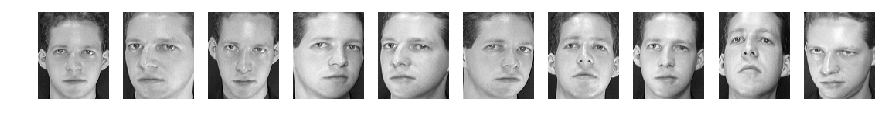

In [4]:
# reshape images
images = []
for i in range(vectors.shape[1]):
    images.append(np.reshape(vectors[:, i], (92, 112)))
    
# plot the 10 first faces
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(ndimage.rotate(images[i], -90), cmap="gray")
    plt.axis('off')

**EM-algorithm**

In [5]:
def nmf_em(V, K, alpha_w, alpha_h, beta_w, beta_h, max_iter=50, compute_KL=False):
    F, N = V.shape
    div_KL_list = []
    
    # initialization with samples drawn from a Gamma distribution
    W = np.random.gamma(shape=alpha_w, scale=(1/beta_w), size=(F,K))
    H = np.random.gamma(shape=alpha_h, scale=(1/beta_h), size=(K,N))
    
    for t in range(max_iter):
        W = (W * ((V / W.dot(H)).dot(H.T)) + np.full((F, K), (alpha_w - 1))
            ) / (np.full((F, K), beta_w) + np.ones((F, N)).dot(H.T))
        H = (H * (W.T.dot(V / W.dot(H))) + np.full((K, N), (alpha_h - 1))
            ) / (np.full((K, N), beta_h) + W.T.dot(np.ones((F, N))))
        
        if compute_KL:
            div_KL_list.append(kl_divergence(V, W.dot(H)))
        
    return W, H, div_KL_list

def kl_divergence(P, Q):
    eps = 1e-10
    # add a tiny epsilon to P and Q to avoid division by 0
    P = P + eps
    Q = Q + eps
    return - np.sum(P * np.log(Q / P) - Q + P)

def plot_faces(vects, *args):
    plt.figure(figsize=(16,8), facecolor='#ececec')
    plt.suptitle(r'$K={}\\[4pt]\alpha_w={},\alpha_h={}\\[4pt]\beta_w={},\beta_h={}$'.format(
        args[0], args[1], args[2], args[3], args[4]), fontsize=20)
    for i in range(21):
        plt.subplot(3,7,i+1)
        plt.imshow(ndimage.rotate(np.reshape(W[:, i], (92, 112)), -90), 
                   cmap="gray", vmin=0, vmax=1)
        plt.axis('off')
    plt.subplots_adjust(top=0.8)
    plt.show()

**Output of images in $W$**

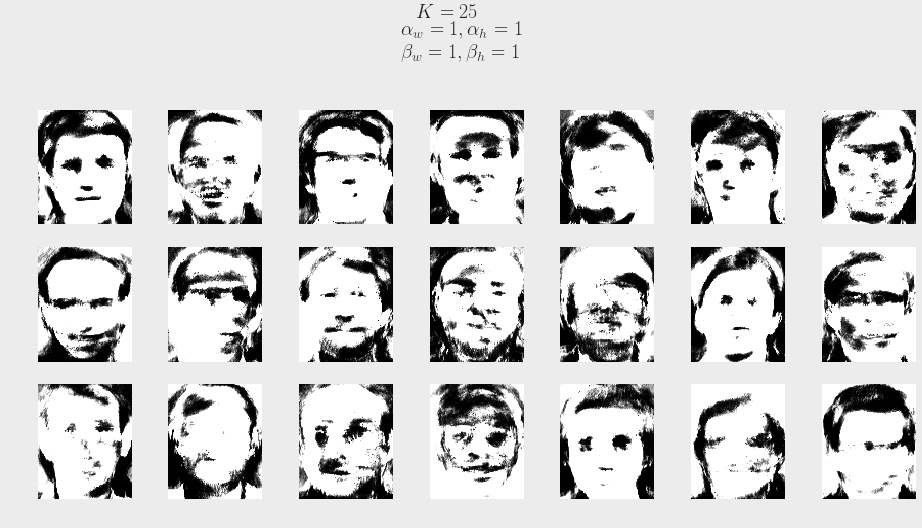

In [6]:
alpha_w = 1
alpha_h = 1
beta_w = 1
beta_h = 1
K = 25
W, H, div_KL = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, 
                      max_iter=300, compute_KL=True)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

**Kullback-Leibler divergence**

Text(0.5, 0, 'Iterations')

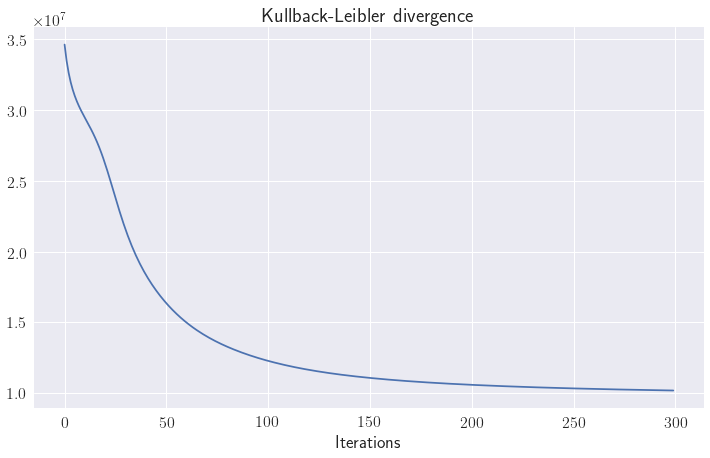

In [7]:
plt.figure(figsize=(12,7))
plt.plot(div_KL)
plt.title('Kullback-Leibler divergence', fontsize=20)
plt.xlabel('Iterations')

**Comments:**

We notice that 300 iterations are enough for the algorithm to stabilize. Therefore, we will use the same amount of iterations for the next runs. 

### Influence of $\beta_w$ and $\beta_h$
Run the algorithm on the face dataset. Set $K = 25, \alpha_w=\alpha_h = 1$. Try different values for $\beta_w$ and $\beta_h$. Visualize the columns of estimated $W$ matrices. What do you observe when you change the parameters?

<div class="alert alert-info">
<strong style="font-size:20px">Low $\beta_w$</strong>
</div>

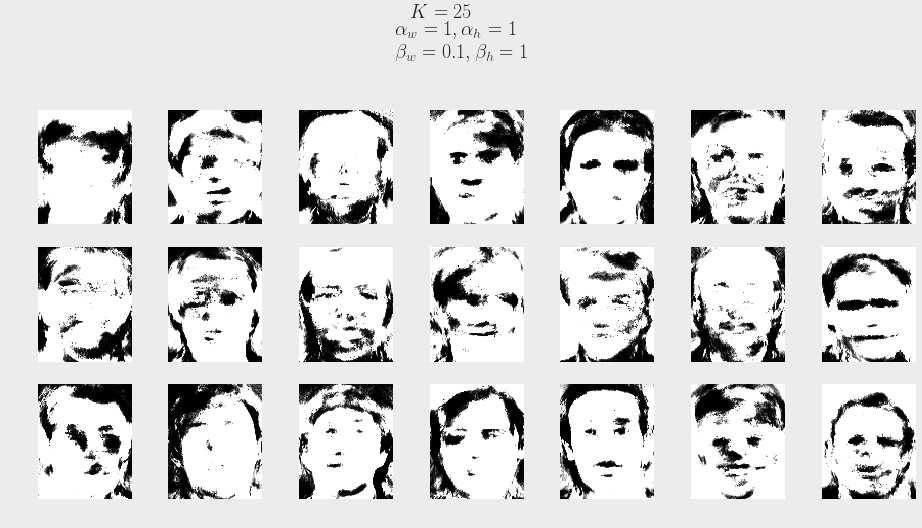

In [8]:
alpha_w = 1
alpha_h = 1
beta_w = 0.1
beta_h = 1
K = 25
W, H, _ = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, max_iter=300)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

<div class="alert alert-info">
<strong style="font-size:20px">High $\beta_w$</strong>
</div>

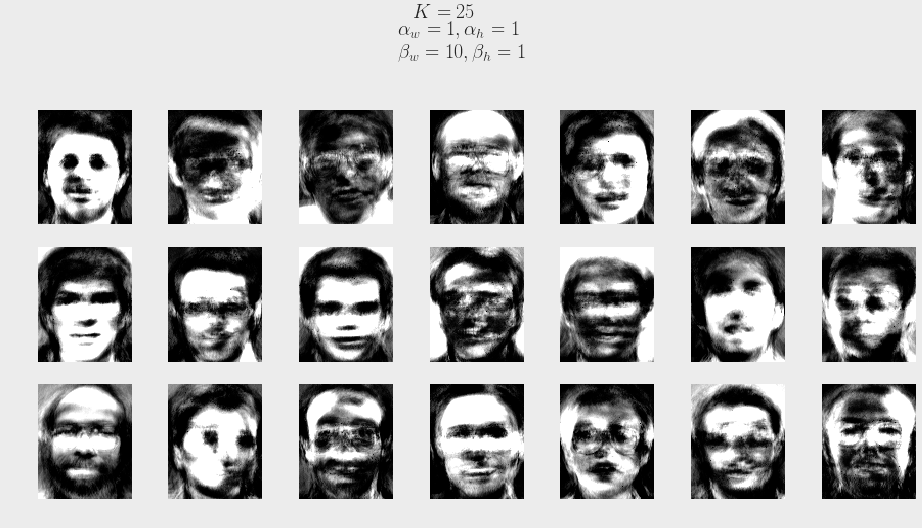

In [9]:
alpha_w = 1
alpha_h = 1
beta_w = 10
beta_h = 1
K = 25
W, H, _ = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, max_iter=300)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

<div class="alert alert-info">
<strong style="font-size:20px">Low $\beta_h$</strong>
</div>

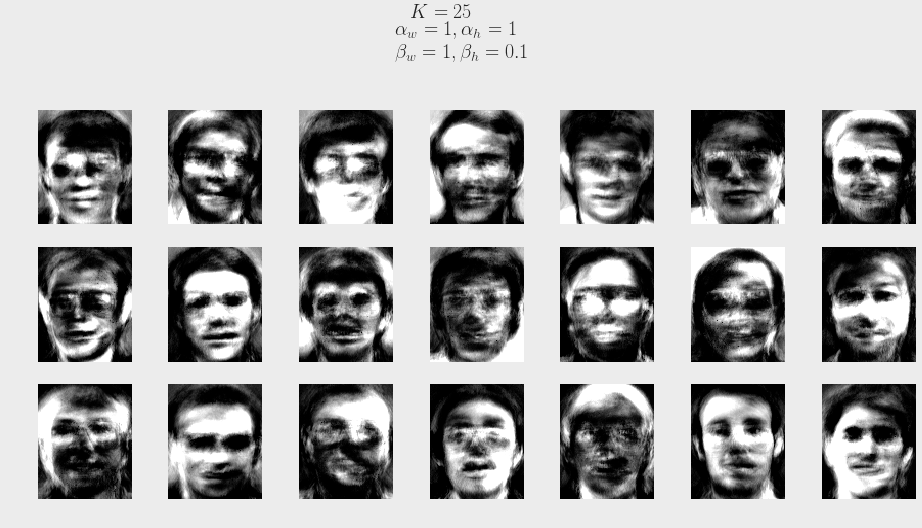

In [10]:
alpha_w = 1
alpha_h = 1
beta_w = 1
beta_h = 0.1
K = 25
W, H, _ = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, max_iter=300)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

<div class="alert alert-info">
<strong style="font-size:20px">High $\beta_h$</strong>
</div>

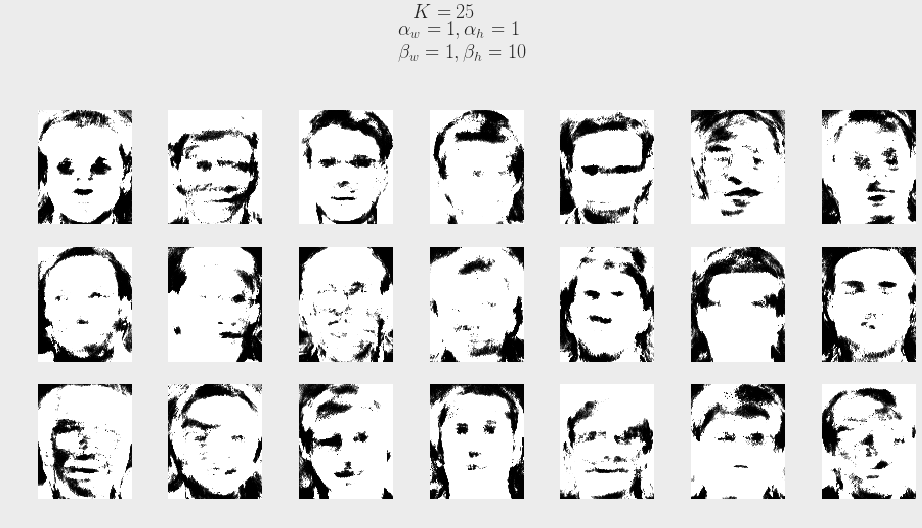

In [11]:
alpha_w = 1
alpha_h = 1
beta_w = 1
beta_h = 10
K = 25
W, H, _ = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, max_iter=300)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

<div class="alert alert-warning">
<strong>Comments on the influence of $\beta_w$ and $\beta_h$</strong>
<br><br>
From these plots, we can observe interesting things about $\beta_w$ and $\beta_h$. 
    
We notice that the higher the value of $\beta_w$ is, the more the faces have details. We observe the same thing when $\beta_h$ is closer to zero. The faces almost look like real ones. But we have to be careful when we set these parameters. If $\beta_w$ is too big, or if $\beta_h$ is to close to 0, the images of $W$ could be completely dark, and we would lose all the information.

When $\beta_w$ is close to 0, or when $\beta_h$ is high, the output is similar to our first run when all parameters where equal to 1. 
    
</div>

### Influence of $\alpha_w$ and $\alpha_h$

Run the algorithm with $K = 25, \beta_w = \beta_h = 1$. Try different values for $\alpha_w$ and $\alpha_h$ . Visualize the columns of estimated $W$ matrices. What do you observe when you change the parameters?

<div class="alert alert-info">
<strong style="font-size:20px">Low $\alpha_w$</strong>
</div>

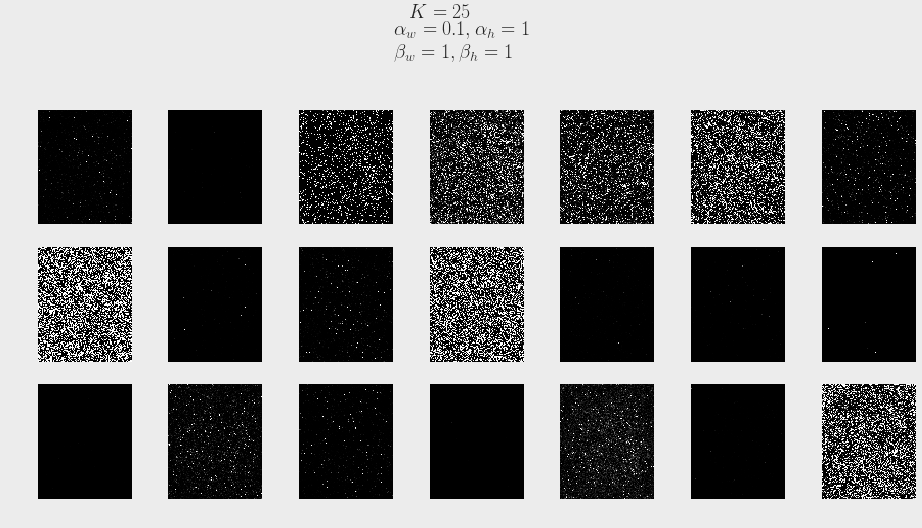

In [12]:
alpha_w = 0.1
alpha_h = 1
beta_w = 1
beta_h = 1
K = 25
W, H, _ = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, max_iter=300)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

<div class="alert alert-info">
<strong style="font-size:20px">High $\alpha_w$</strong>
</div>

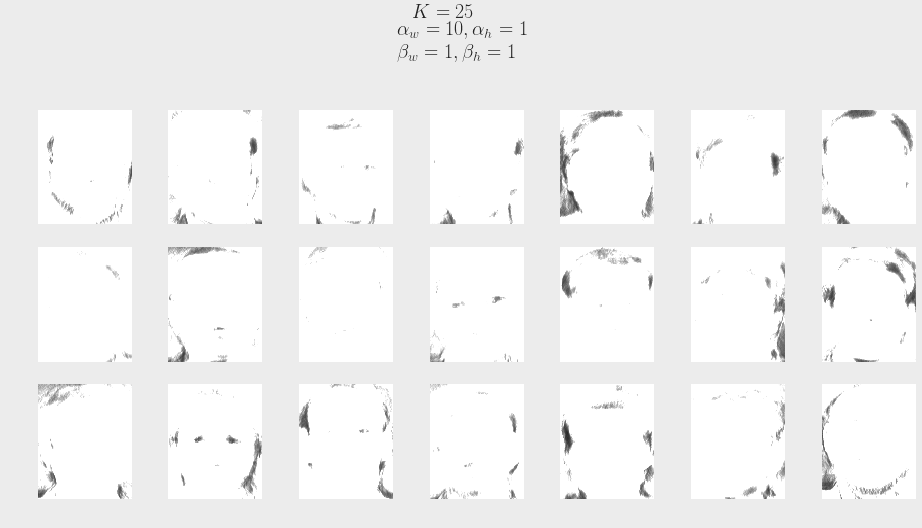

In [13]:
alpha_w = 10
alpha_h = 1
beta_w = 1
beta_h = 1
K = 25
W, H, _ = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, max_iter=300)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

<div class="alert alert-info">
<strong style="font-size:20px">Low $\alpha_h$</strong>
</div>

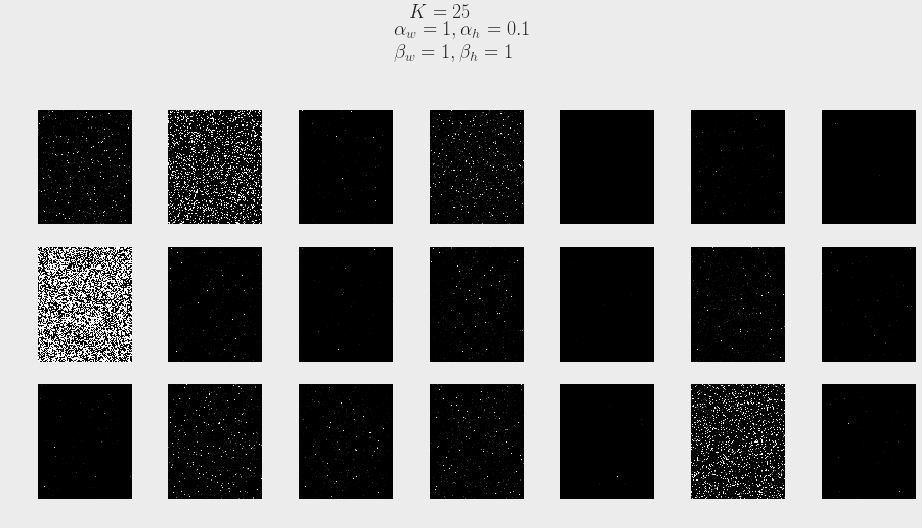

In [14]:
alpha_w = 1
alpha_h = 0.1
beta_w = 1
beta_h = 1
K = 25
W, H, _ = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, max_iter=300)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

<div class="alert alert-info">
<strong style="font-size:20px">High $\alpha_h$</strong>
</div>

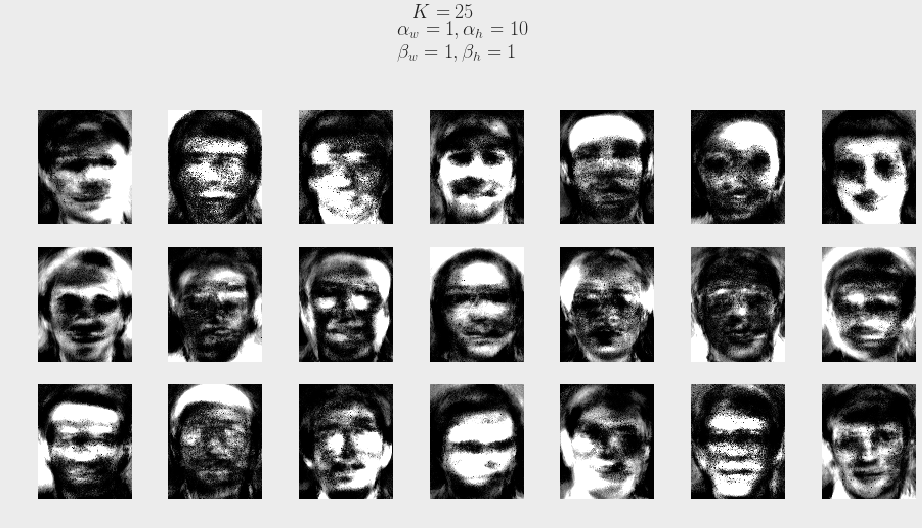

In [15]:
alpha_w = 1
alpha_h = 10
beta_w = 1
beta_h = 1
K = 25
W, H, _ = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, max_iter=300)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

<div class="alert alert-warning">
<strong>Comments on the influence of $\alpha_w$ and $\alpha_h$</strong>
<br><br>
The first thing we notice is that if the value of $\alpha_w$ and $\alpha_h$ are smaller than 1, then the output could be only noise. This is more likely when the values are closer to 0 than 1. We explain this by the fact that in the updates of the EM-algorithm, we calculate $(\alpha_w-1)J_{F,K}$ and $(\alpha_h-1)J_{K,N}$. If $\alpha_w$ and $\alpha_h$ are smaller than 1, then these matrices are negative. 
    
The second thing that we notice is that when $\alpha_w$ gets bigger, the images are whiter. Therefore, we are losing details on the faces. If $\alpha_w$ is too big, then the images will be completely white and unusable.

We have the opposite effect when the value of $\alpha_h$ grows. In fact, the bigger the value of $\alpha_h$ is, the darker the images are. Here also, if  $\alpha_h$ is too big, the images will become entirely dark. 
</div>

### Influence of K

Now try changing the number of components K. What do you observe?

<div class="alert alert-info">
<strong style="font-size:20px">Small $K$</strong>
</div>

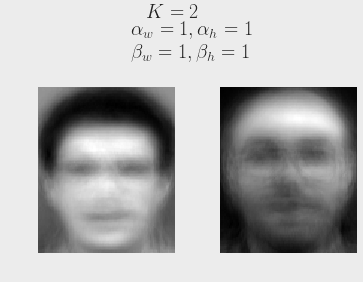

In [16]:
alpha_w = 1
alpha_h = 1
beta_w = 1
beta_h = 1
K = 2
W, H, KL_K1 = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, 
                     max_iter=300, compute_KL=True)

plt.figure(figsize=(6,4), facecolor='#ececec')
plt.suptitle(r'$K={}\\[4pt]\alpha_w={},\alpha_h={}\\[4pt]\beta_w={},\beta_h={}$'.format(
    K, alpha_w, alpha_h, beta_w, beta_h), fontsize=20)
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(ndimage.rotate(np.reshape(W[:, i], (92, 112)), -90), cmap="gray")
    plt.axis('off')
plt.subplots_adjust(top=0.7)
plt.show()

<div class="alert alert-info">
<strong style="font-size:20px">Medium $K$</strong>
</div>

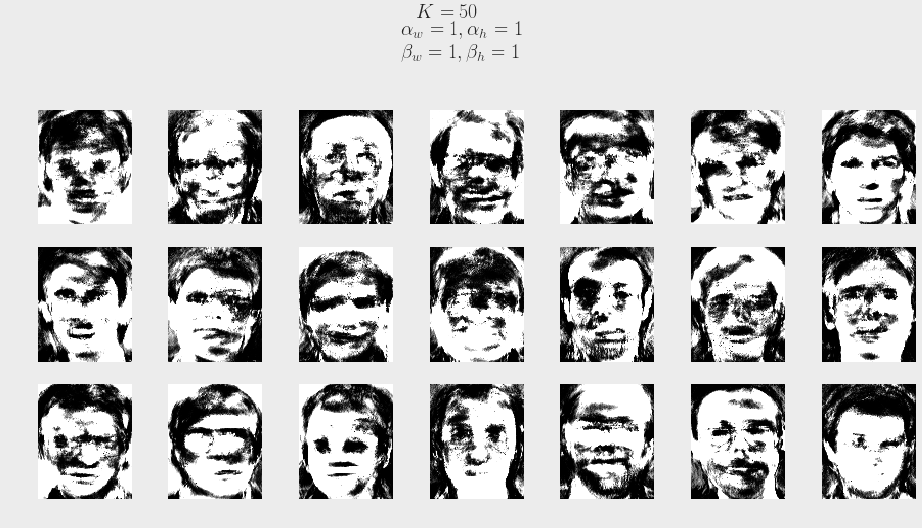

In [17]:
alpha_w = 1
alpha_h = 1
beta_w = 1
beta_h = 1
K = 50
W, H, KL_K2 = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, 
                     max_iter=300, compute_KL=True)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

<div class="alert alert-info">
<strong style="font-size:20px">Big $K$</strong>
</div>

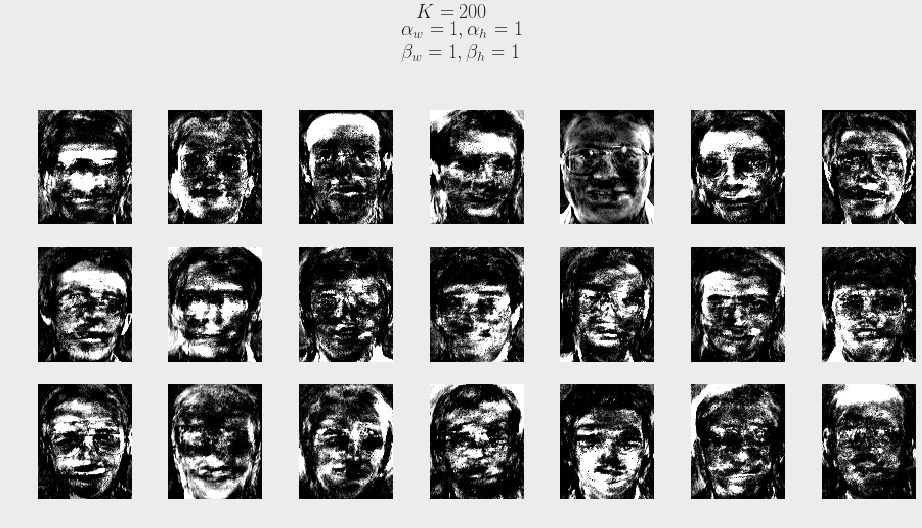

In [18]:
alpha_w = 1
alpha_h = 1
beta_w = 1
beta_h = 1
K = 200
W, H, KL_K3 = nmf_em(vectors, K, alpha_w, alpha_h, beta_w, beta_h, 
                     max_iter=300, compute_KL=True)
plot_faces(W, K, alpha_w, alpha_h, beta_w, beta_h)

<div class="alert alert-info">
<strong style="font-size:20px">Difference of divergence</strong>
</div>

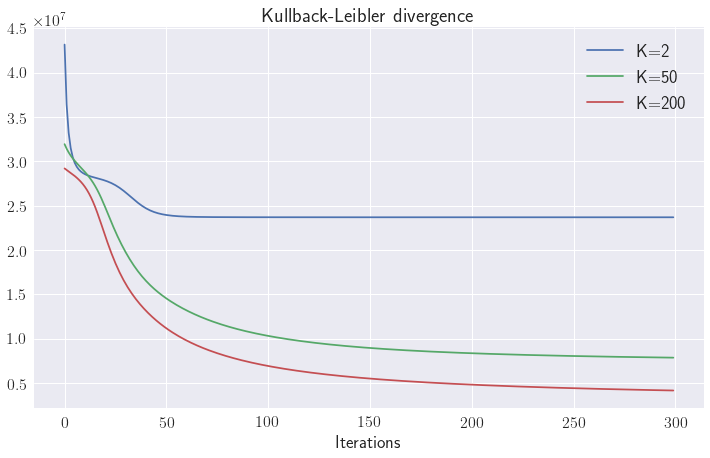

In [19]:
plt.figure(figsize=(12,7))
plt.plot(KL_K1, label='K=2')
plt.plot(KL_K2, label='K=50')
plt.plot(KL_K3, label='K=200')
plt.title('Kullback-Leibler divergence', fontsize=20)
plt.xlabel('Iterations')
plt.legend()

<div class="alert alert-warning">
<strong>Comments on the influence of $K$</strong>
<br><br>
The choice of the number of components $K$ has obviously a huge impact on the output. 
    
When K is very small, the images of $W$ are very similar to the true faces of the dataset, but they are blurred. 

Then, the bigger $K$ gets, the more we have details on the different parts of the faces. 

With the last plot, we also note that we need more iteration when $K$ is big. 
</div>

### Conclusion

The choice of the Gamma parameters $\alpha_w$, $\alpha_h$, $\beta_w$ and $\beta_h$ are essential for the factorization of our matrix $V$. If they are chosen badly, we might end up with completely white or dark images in $W$. It would then be a failure for our factorization. We should try different values to find the optimal ones. 

Concerning the choice of the number of components $K$, it is an arbitrary choice. It only depends on how much we want to factorize the original matrix.